C:\Users\CYS\AppData\Roaming\Python\Python312\site-packages\networkx\readwrite\json_graph\node_link.py:290: FutureWarning: 
The default value will be changed to `edges="edges" in NetworkX 3.6.

To make this warning go away, explicitly set the edges kwarg, e.g.:

  nx.node_link_graph(data, edges="links") to preserve current behavior, or
  nx.node_link_graph(data, edges="edges") for forward compatibility.
  warnings.warn(


日志系统初始化成功
模型初始化成功
开始运行模拟，共1轮
运行第1轮模拟...
public_debate: 0 start
调试:log_item 已定义 - {'time': 0, 'event_type': 'public_debate', 'status': 'start', 'details': 'Public debate started at time step 0'}
Content filtered, retrying...
public_debate: 0 end
模拟运行完成


j:\science_studengt\item\casevo-main\casevo-example-main\casevo-example-main\election_example\election_model.py:131: UserWarning: Glyph 26102 (\N{CJK UNIFIED IDEOGRAPH-65F6}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
j:\science_studengt\item\casevo-main\casevo-example-main\casevo-example-main\election_example\election_model.py:131: UserWarning: Glyph 38388 (\N{CJK UNIFIED IDEOGRAPH-95F4}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
j:\science_studengt\item\casevo-main\casevo-example-main\casevo-example-main\election_example\election_model.py:131: UserWarning: Glyph 27493 (\N{CJK UNIFIED IDEOGRAPH-6B65}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
j:\science_studengt\item\casevo-main\casevo-example-main\casevo-example-main\election_example\election_model.py:131: UserWarning: Glyph 26234 (\N{CJK UNIFIED IDEOGRAPH-667A}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
j:\science_studengt\item\casevo-main\casevo-example-main\casevo-example-main\ele

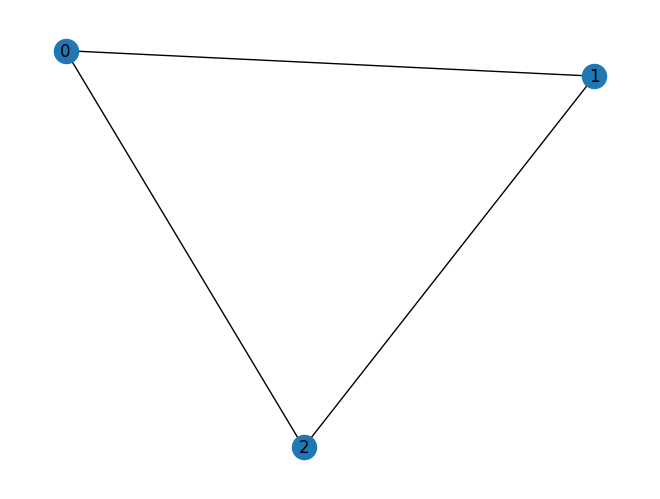

C:\Users\CYS\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 26234 (\N{CJK UNIFIED IDEOGRAPH-667A}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\CYS\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 33021 (\N{CJK UNIFIED IDEOGRAPH-80FD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\CYS\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 20307 (\N{CJK UNIFIED IDEOGRAPH-4F53}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\CYS\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\CYS\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: User

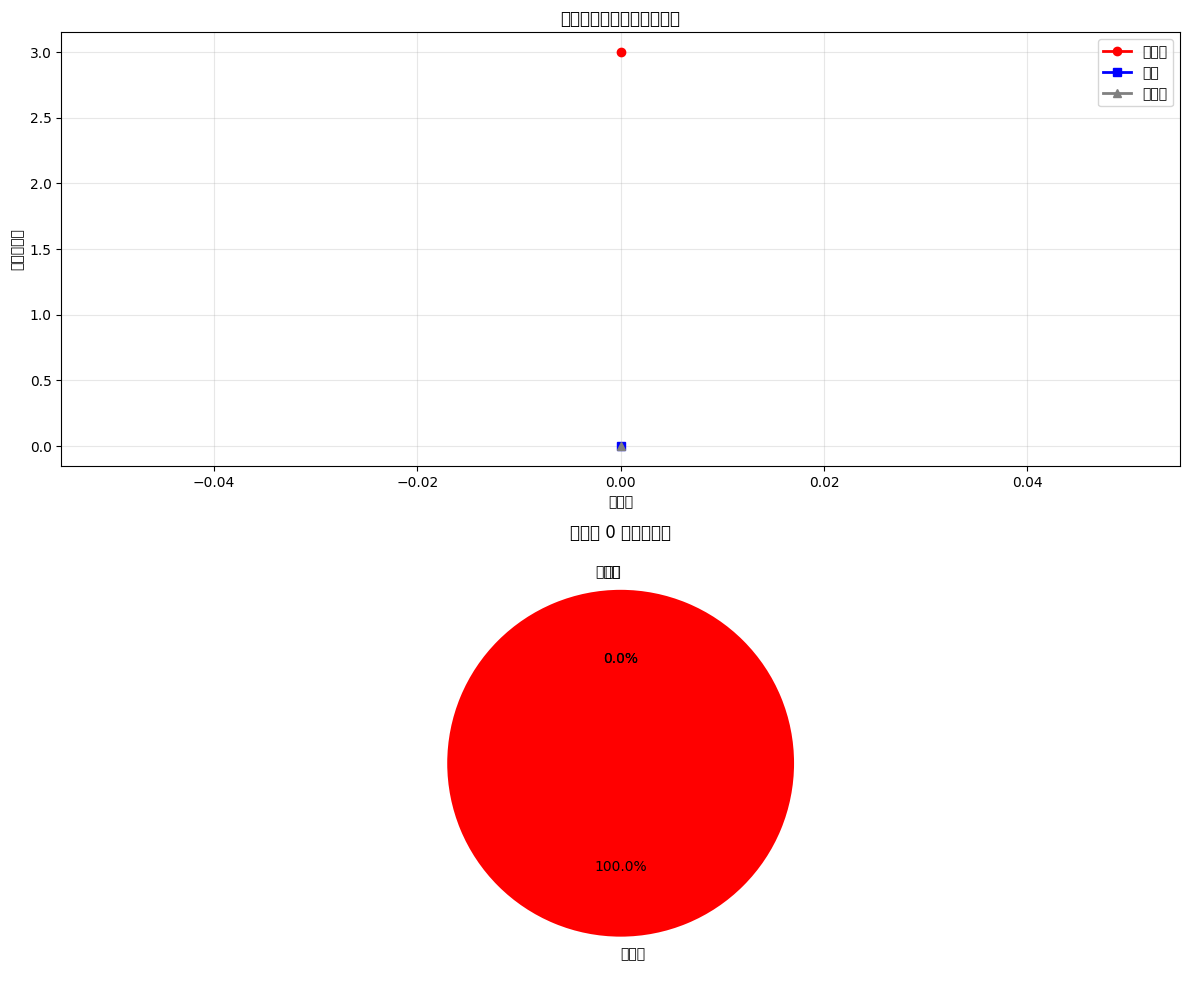


投票数据详情:
 time_step  trump  biden  undecided  total_agents
         0      3      0          0             3
日志已成功写入到: ./log1/
最终结果: 特朗普 100.0%, 拜登 0.0%, 未决定 0.0%


In [ ]:
import os
from networkx.readwrite import json_graph
import networkx as nx
import json 
import matplotlib.pyplot as plt
from election_model import ElectionModel 
from election_agent import ElectionAgent
import argparse
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from llms.baichuan import BaichuanLLM
#from llms.ollama_lib import OllamaLLM

from casevo import TotLog
import matplotlib.pyplot as plt
import matplotlib

# 设置中文字体支持
plt.rcParams['font.sans-serif'] = ['SimHei', 'Microsoft YaHei', 'DejaVu Sans']  # 设置中文字体
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题
matplotlib.rcParams['font.size'] = 12  # 设置字体大小
# Get Key From: https://platform.baichuan-ai.com/
API_KEY = 'sk-eb470e20c8c67f5a54ca8b18ed0c916b'
llm = BaichuanLLM(API_KEY, 5)

#Ollama Interface
#llm = OllamaLLM(5)

parser = argparse.ArgumentParser(description='run the Mesa model.')
###config_file='./case_lite.json'
###round_num=6

# Get Config File
parser.add_argument('filename', metavar='filename', type=str,
                   help='.\\case_lite.json')
parser.add_argument('round', metavar='round_num', type=int,
                   help='6')
args = parser.parse_args(['./case_lite.json', '1'])  # 手动指定参数值

#args = parser.parse_args()

tar_file = args.filename

with open(tar_file, 'r') as f:
    config_file = json.load(f) 

# Get Config of the Network and the Agent Profile
G = json_graph.node_link_graph(config_file['graph'])
person_list = config_file['person']

# Draw the network
nx.draw(G, with_labels=True)
plt.savefig('graph.png')

log_path = './log1/'
memory_path = './memory1/'


if not os.path.exists(log_path):
    os.mkdir(log_path)
if not os.path.exists(memory_path):
    os.mkdir(memory_path)

try:
    TotLog.init_log(len(person_list), if_event=True)
    print("日志系统初始化成功")
except Exception as e:
    print(f"日志系统初始化失败: {e}")
    exit(1)

# 初始化模型（假设G、person_list、llm已正确定义）
try:
    model = ElectionModel(G, person_list, llm)
    print("模型初始化成功")
except Exception as e:
    print(f"模型初始化失败: {e}")
    exit(1)

# 运行模拟（使用正确的参数名round_num）
print(f"开始运行模拟，共{args.round}轮")
try:
    for i in range(args.round):
        print(f"运行第{i+1}轮模拟...")
        model.step()
    print("模拟运行完成")
except Exception as e:
    print(f"模拟运行过程中出错: {e}")
    exit(1)


model.visualize_vote_results()

# 写入日志
try:
    TotLog.write_log(log_path)
    print(f"日志已成功写入到: {log_path}")
except Exception as e:
    print(f"写入日志失败: {e}")
    exit(1)

stats = model.get_vote_statistics()
print(f"最终结果: 特朗普 {stats['final_trump_percentage']:.1f}%, "
      f"拜登 {stats['final_biden_percentage']:.1f}%, "
      f"未决定 {stats['final_undecided_percentage']:.1f}%")
'''

TotLog.init_log(len(person_list), if_event=True)


# Init Model
model = ElectionModel(G, person_list, llm)

# Run the Sim
for i in range(args.round):
    model.step()

# Write Log
TotLog.write_log(log_path) '''
def visualize_vote_results(self):
        """绘制智能体投票结果的可视化图"""
        if not self.vote_data:
            print("没有投票数据可可视化")
            return
            
        df = pd.DataFrame(self.vote_data)
        
        # 创建可视化图表
        fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))
        
        # 子图1：投票数量随时间变化
        ax1.plot(df['time_step'], df['trump'], 'r-', label='特朗普', linewidth=2, marker='o')
        ax1.plot(df['time_step'], df['biden'], 'b-', label='拜登', linewidth=2, marker='s')
        ax1.plot(df['time_step'], df['undecided'], 'gray', label='未决定', linewidth=2, marker='^')
        ax1.set_xlabel('时间步')
        ax1.set_ylabel('智能体数量')
        ax1.set_title('智能体投票意向随时间变化')
        ax1.legend()
        ax1.grid(True, alpha=0.3)
        
        # 子图2：投票比例饼图（最新时间步）
        latest = df.iloc[-1]
        labels = ['特朗普', '拜登', '未决定']
        sizes = [latest['trump'], latest['biden'], latest['undecided']]
        colors = ['red', 'blue', 'lightgray']
        
        ax2.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
        ax2.set_title(f'时间步 {latest["time_step"]} 的投票分布')
        
        plt.tight_layout()
        plt.show()
        
        # 打印详细数据
        print("\n投票数据详情:")
        print(df.to_string(index=False))
        
        return fig
    
def get_vote_statistics(self):
        """获取投票统计数据"""
        if not self.vote_data:
            return None
            
        df = pd.DataFrame(self.vote_data)
        latest = df.iloc[-1]
        
        stats = {
            'final_trump_percentage': (latest['trump'] / latest['total_agents']) * 100,
            'final_biden_percentage': (latest['biden'] / latest['total_agents']) * 100,
            'final_undecided_percentage': (latest['undecided'] / latest['total_agents']) * 100,
            'total_time_steps': len(df),
            'max_trump_support': df['trump'].max(),
            'max_biden_support': df['biden'].max()
        }
        
        return stats       